In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
sns.set()

# imports

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# imports for classification

In [127]:
football_df= pd.read_csv("Football.csv")

In [104]:
football_df.Goals.value_counts()

Goals
11    67
12    64
10    55
9     50
4     48
13    47
14    37
8     36
15    30
16    29
5     28
7     25
18    22
6     20
17    14
3     14
21    10
22    10
2      9
25     6
19     6
29     5
23     4
28     4
20     3
24     3
36     3
26     3
31     3
33     2
30     1
37     1
34     1
Name: count, dtype: int64

In [105]:
football_df.Goals.describe()

count    660.000000
mean      11.784848
std        5.982454
min        2.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       37.000000
Name: Goals, dtype: float64

In [106]:
football_df = pd.read_csv("Football.csv")

In [107]:
football_df.keys()

Index(['Country', 'League', 'Club', 'Player Names', 'Matches_Played',
       'Substitution ', 'Mins', 'Goals', 'xG', 'xG Per Avg Match', 'Shots',
       'OnTarget', 'Shots Per Avg Match', 'On Target Per Avg Match', 'Year'],
      dtype='object')

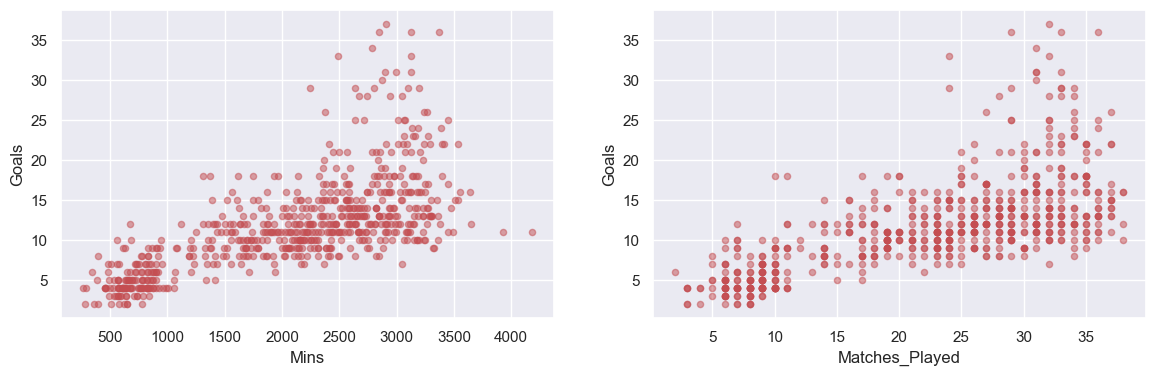

In [108]:
# scattering

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))


for xcol, ax in zip(['Mins', 'Matches_Played'], axes):
    football_df.plot(kind='scatter', x=xcol, y='Goals', ax=ax, alpha=0.5, color='r')

plt.show()

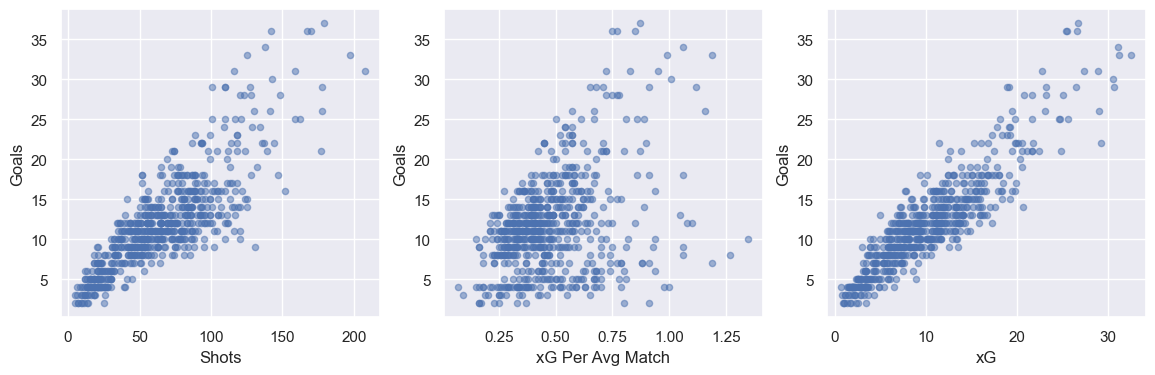

In [109]:
# more scattering

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
for xcol, ax in zip(['Shots', 'xG Per Avg Match', 'xG'], axes):
    football_df.plot(kind='scatter', x=xcol, y='Goals', ax=ax, alpha=0.5, color='b')

plt.show()

# xG = expected goals


In [110]:
def Performance(x):
    if x<=7:
        return('Underperforming player')
    elif x<12:
        return('Solid player')
    elif x<=19:
        return('Great player')
    elif x>=20:
        return('Elite player')
   
    
    
# arbitrary 

In [111]:

football_df.Goals.apply(lambda x: Performance(x))

0                Solid player
1                Great player
2                Elite player
3                Great player
4                Great player
                ...          
655              Solid player
656              Great player
657    Underperforming player
658              Great player
659    Underperforming player
Name: Goals, Length: 660, dtype: object

In [112]:
football_df['Performance'] = football_df.Goals.apply(lambda x: Performance(x))

In [113]:
football_df['Performance'].value_counts()

# how many players of each skill level

Performance
Great player              249
Solid player              208
Underperforming player    144
Elite player               59
Name: count, dtype: int64

In [114]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [123]:
le.fit_transform(football_df['Performance'])
football_df['Club_enc'] = le.fit_transform(football_df['Club'])
football_df['Performance'].value_counts()
football_df['Club_enc'].value_counts()

Club_enc
179    34
118    14
11     13
104    13
125    11
       ..
91      1
61      1
137     1
27      1
154     1
Name: count, Length: 180, dtype: int64

In [125]:
football_df.keys()



Index(['Country', 'League', 'Club', 'Player Names', 'Matches_Played',
       'Substitution ', 'Mins', 'Goals', 'xG', 'xG Per Avg Match', 'Shots',
       'OnTarget', 'Shots Per Avg Match', 'On Target Per Avg Match', 'Year',
       'Performance', 'Goals_enc', 'Goals_str', 'Club_enc'],
      dtype='object')

In [126]:
football_df.head()

# can see the new columns 

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year,Performance,Goals_enc,Goals_str,Club_enc
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016,Solid player,9,Solid player,14
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016,Great player,14,Great player,11
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016,Elite player,25,Elite player,6
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016,Great player,11,Great player,31
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016,Great player,11,Great player,155


In [118]:
data = pd.read_csv('Football.csv')

# reloading the data set

In [119]:
X = data[['xG', 'Shots']]
y = data['Goals']

# xG = expected goals 

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# splitting

In [121]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.14393939393939395


In [122]:

football_df['Goals_str'] = football_df.Goals.apply(lambda x: Skill(x))